# Практичне заняття на тему
# «Лінійний парний регресійний аналіз даних. Оцінка метричних показників»

## Мета

Метою заняття є ознайомлення з основами лінійного парного регресійного аналізу даних та методикою оцінка його метричних показників.

## Завдання.

За спостережуваними даними побудувати рівняння лінійної регресії методом найменших квадратів.

Графічно представити результати лінії регресії та спостережувані дані. Виконати інтерпретацію коефіцієнтів моделі, оцінити якість побудованої моделі, використовуючи різні характеристики:

* коефіцієнт кореляції;
* коефіцієнт детермінації;
* стандартну похибку регресії;
* довірчі інтервали для коефіцієнтів регресії та для прогнозних значень;
* усереднений коефіцієнт еластичності.

## Опис вихідних даних для побудови лінійної парної регресійної моделі

Відповідно до умови завдання, ми використовуємо дані для 4 варіанту:
- $a_0 = 3,4$
- $a_1 = 2,7$
- $rnd(b) = 1,10$

Модель для генерації даних: $y(x) = a_0 + a_1 x + rnd(b)$

In [1]:
# Побудови графіку лінійного рівняння
import numpy as np
import matplotlib.pyplot as plt

# Параметри моделі для 4 варіанту
a0 = 3.4
a1 = 2.7

# Створюємо масив значень x
n = 51  # Кількість точок
x = np.linspace(0, 5, n)
print(f'{x = }')

x = array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
       2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8,
       3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. ])


In [2]:
# Обчислюємо значення функції y(x) = a0*x + a1
y = a0 * x + a1

print(f'y(x) = {y}')

y(x) = [ 2.7   3.04  3.38  3.72  4.06  4.4   4.74  5.08  5.42  5.76  6.1   6.44
  6.78  7.12  7.46  7.8   8.14  8.48  8.82  9.16  9.5   9.84 10.18 10.52
 10.86 11.2  11.54 11.88 12.22 12.56 12.9  13.24 13.58 13.92 14.26 14.6
 14.94 15.28 15.62 15.96 16.3  16.64 16.98 17.32 17.66 18.   18.34 18.68
 19.02 19.36 19.7 ]


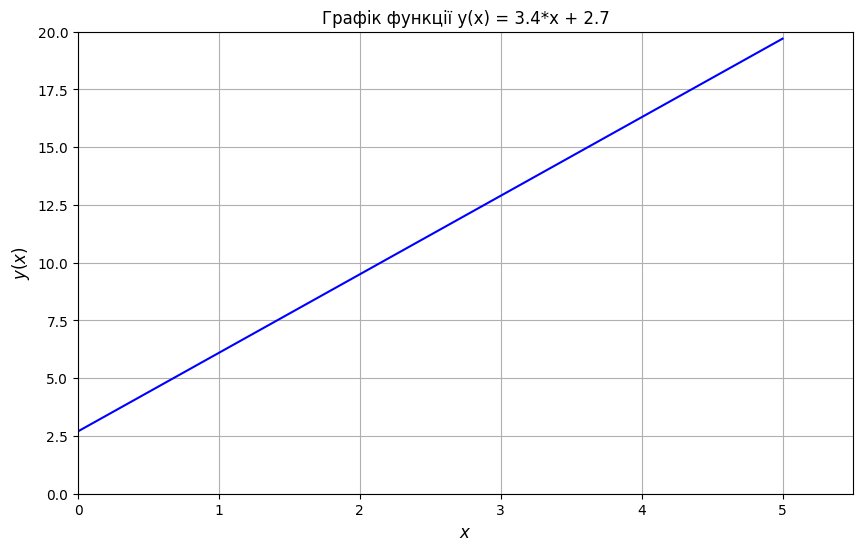

In [3]:
# Будуємо графік
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'b-')
plt.xlim(0, 5.5)
plt.ylim(0, 20)
plt.grid(True)
plt.xlabel('$x$', fontsize=12)
plt.ylabel('$y(x)$', fontsize=12)
plt.title('Графік функції y(x) = 3.4*x + 2.7')
plt.show()

## Генерація даних з шумом

Тепер згенеруємо дані для нашого варіанту завдання з додаванням випадкового шуму. Це дозволить нам змоделювати реальні спостережувані дані, які завжди містять певний елемент випадковості.

Стандартне відхилення (або середньоквадратичне відхилення) нормального розподілу приймаємо згідно завдання $rnd(b) = 1,10$.

In [4]:
# Генерація даних з шумом для нашого варіанту

# Встановлюємо seed для відтворюваності результатів
np.random.seed(42)


rnd_b = 1.10

# Генеруємо випадковий шум із стандартним відхиленням rnd_b
noise = np.random.normal(0, rnd_b, size=n)
print(f'{noise = }')

noise = array([ 0.54638557, -0.15209073,  0.71245739,  1.67533284, -0.25756871,
       -0.25755065,  1.7371341 ,  0.8441782 , -0.51642182,  0.59681605,
       -0.50975946, -0.51230273,  0.2661585 , -2.10460827, -1.89740962,
       -0.61851628, -1.11411423,  0.34567207, -0.99882648, -1.55353407,
        1.61221365, -0.24835393,  0.07428103, -1.567223  , -0.598821  ,
        0.12201485, -1.26609294,  0.41326782, -0.66070256, -0.32086312,
       -0.66187727,  2.037506  , -0.01484695, -1.16348202,  0.9047994 ,
       -1.34292801,  0.22974995, -2.15563714, -1.46100465,  0.21654736,
        0.81231324,  0.18850511, -0.12721311, -0.33121407, -1.62637419,
       -0.79182863, -0.50670265,  1.16283445,  0.37798012, -1.93934417,
        0.35649237])


In [5]:
# Обчислюємо значення y за моделлю з шумом
y = a0 + a1 * x + noise

print(f'y(x) = {y}')

y(x) = [ 3.94638557  3.51790927  4.65245739  5.88533284  4.22243129  4.49244935
  6.7571341   6.1341782   5.04357818  6.42681605  5.59024054  5.85769727
  6.9061585   4.80539173  5.28259038  6.83148372  6.60588577  8.33567207
  7.26117352  6.97646593 10.41221365  8.82164607  9.41428103  8.042777
  9.281179   10.27201485  9.15390706 11.10326782 10.29929744 10.90913688
 10.83812273 13.807506   12.02515305 11.14651798 13.4847994  11.50707199
 13.34974995 11.23436286 12.19899535 14.14654736 15.01231324 14.65850511
 14.61278689 14.67878593 13.65362581 14.75817137 15.31329735 17.25283445
 16.73798012 14.69065583 17.25649237]


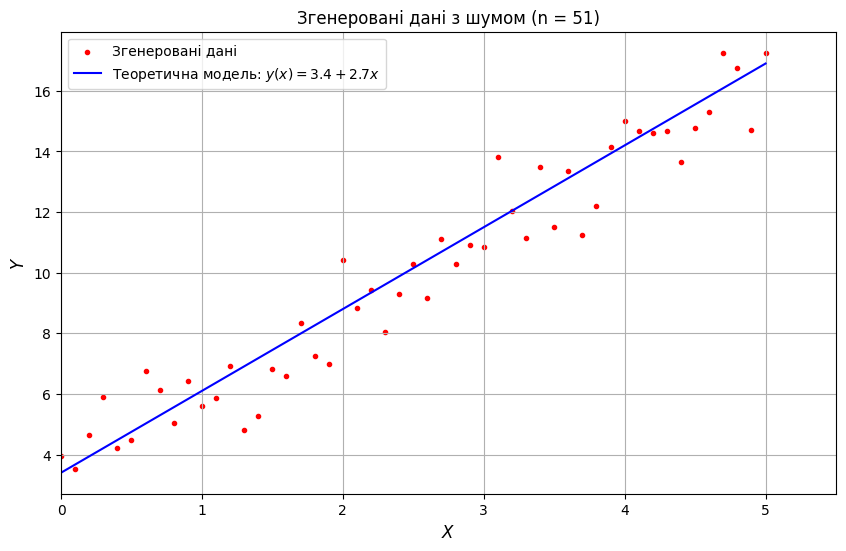

In [6]:
# Будуємо графік
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='red', marker='.', label='Згенеровані дані')
plt.plot(x, a0 + a1 * x, color='blue', label=f'Теоретична модель: $y(x) = {a0} + {a1}x$')
plt.xlim(0, 5.5)
plt.grid(True)
plt.xlabel('$X$', fontsize=12)
plt.ylabel('$Y$', fontsize=12)
plt.title(f'Згенеровані дані з шумом (n = {n})')
plt.legend()
plt.show()

## Побудова лінійної парної регресійної моделі для залежності між змінними

Для побудови лінійної регресійної моделі використовується метод найменших квадратів.

## Розрахунок параметрів лінійної регресії методом найменших квадратів

### Обчислення середніх значень

1. Обчислення середнього значення залежної змінної: $$y_{ср} = \frac{1}{n} \cdot \sum_{i=0}^{n-1} Y_i$$

In [7]:
y_cp = sum(y) / len(y)

print(f'y_cp = {y_cp:.3f}')

y_cp = 9.914


або

In [8]:
y_ср = np.mean(y)


print(f"Середнє значення y: y_ср = {y_ср:.3f}")

Середнє значення y: y_ср = 9.914


2. Обчислення середнього значення незалежної змінної: $$x_{ср} = \frac{1}{n} \cdot \sum_{i=0}^{n-1} X_i$$

In [9]:
x_ср = np.mean(x)

print(f"Середнє значення x: x_ср = {x_ср:.3f}")

Середнє значення x: x_ср = 2.500


3. Обчислення середнього значення квадратів незалежної змінної: $$x2_{ср} = \frac{1}{n} \cdot \sum_{i=0}^{n-1} X_i^2$$

In [10]:
x2_ср = np.mean(x**2)

print(f"Середнє значення x²: x²_ср = {x2_ср:.3f}")

Середнє значення x²: x²_ср = 8.417


4. Обчислення середнього значення добутків змінних: $$xy_{ср} = \frac{1}{n} \cdot \sum_{i=0}^{n-1} X_i \cdot Y_i$$

In [11]:
xy_ср = np.mean(x*y)

print(f"Середнє значення xy: xy_ср = {xy_ср:.3f}")

Середнє значення xy: xy_ср = 30.398


### Розрахунок коефіцієнтів регресії

5. Розрахунок коефіцієнта нахилу лінії регресії: $$a_1 = \frac{xy_{ср} - x_{ср} \cdot y_{ср}}{x2_{ср} - x_{ср}^2}$$

In [12]:
a1 = (xy_ср - x_ср * y_ср) / (x2_ср - x_ср**2)

print(f"Коефіцієнт нахилу: a1 = {a1:.3f}")

Коефіцієнт нахилу: a1 = 2.591


6. Розрахунок вільного члена лінії регресії: $$a_0 = y_{ср} - a_1 \cdot x_{ср}$$

In [13]:
a0 = y_ср - a1 * x_ср

print(f"Вільний член: a0 = {a0:.3f}")

Вільний член: a0 = 3.436


Таким чином рівняння лінійоної регресії:

In [14]:
print(f"Рівняння регресії: y(x) = {a0:.4f} + {a1:.4f} * x")

Рівняння регресії: y(x) = 3.4363 + 2.5910 * x


### $y(x) = 3.436 + 2.591 \cdot x$

## Обчислення прогнозних значень

In [15]:
y_pred = a0 + a1 * x

print(f'Прогнозне y(x) = {y_pred}')

Прогнозне y(x) = [ 3.43628294  3.6953849   3.95448686  4.21358882  4.47269078  4.73179274
  4.9908947   5.24999665  5.50909861  5.76820057  6.02730253  6.28640449
  6.54550645  6.80460841  7.06371037  7.32281232  7.58191428  7.84101624
  8.1001182   8.35922016  8.61832212  8.87742408  9.13652604  9.395628
  9.65472995  9.91383191 10.17293387 10.43203583 10.69113779 10.95023975
 11.20934171 11.46844367 11.72754563 11.98664758 12.24574954 12.5048515
 12.76395346 13.02305542 13.28215738 13.54125934 13.8003613  14.05946325
 14.31856521 14.57766717 14.83676913 15.09587109 15.35497305 15.61407501
 15.87317697 16.13227893 16.39138088]


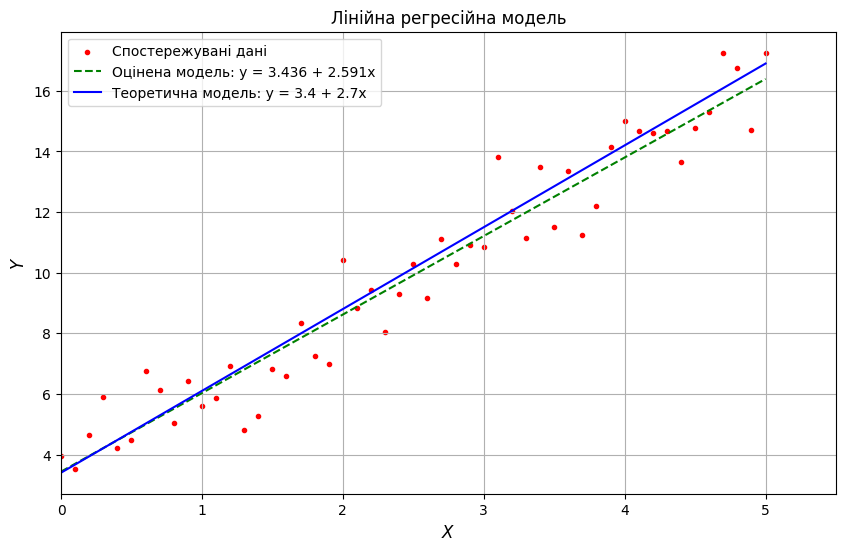

In [16]:
# Візуалізація результатів
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='red', marker='.', label='Спостережувані дані')

plt.plot(x, y_pred, 'g--', label=f'Оцінена модель: y = {a0:.3f} + {a1:.3f}x')
plt.plot(x, 3.4 + 2.7 * x, 'b-', label=f'Теоретична модель: y = 3.4 + 2.7x')

plt.xlim(0, 5.5)
plt.grid(True)
plt.xlabel('$X$', fontsize=12)
plt.ylabel('$Y$', fontsize=12)
plt.title('Лінійна регресійна модель')
plt.legend()
plt.show()

## Структура набору даних для аналізу

Для нашого варіанту 4 використовуємо наступні параметри:
- Кількість точок даних: $n = 51$
- Діапазон значень X: від 0 до 5
- Значення Y генеруються за формулою: $Y_i = a_0 + a_1 \cdot X_i + rnd(b)$
  - $a_0 = 3.4$ (вільний член)
  - $a_1 = 2.7$ (коефіцієнт при X)
  - $rnd(b) = 1.10$ (стандартне відхилення шуму)

Структура даних представлена у вигляді матриці, де перший стовпець містить значення X, а другий стовпець - значення Y.

Для нашого варіанту 4 сформуємо аналогічну таблицю даних з початковими значеннями:

In [17]:
# Створення таблиці даних для аналізу
# Для 4 варіанту: a₀ = 3.4, a₁ = 2.7, rnd(b) = 1.10

# Формуємо датафрейм з наших даних
import pandas as pd

# Створюємо датафрейм
data = pd.DataFrame({'X': x, 'Y': y})

# Виводимо перші 15 рядків даних
print("Структура набору даних для аналізу:")
print(data.head(15))

# Збережемо датафрейм для подальшого аналізу
# Для використання в наступних розрахунках
X = data['X']
Y = data['Y']

# Можемо також обчислити основні статистичні показники
print("\nСтатистичні характеристики даних:")
print(data.describe())

Структура набору даних для аналізу:
      X         Y
0   0.0  3.946386
1   0.1  3.517909
2   0.2  4.652457
3   0.3  5.885333
4   0.4  4.222431
5   0.5  4.492449
6   0.6  6.757134
7   0.7  6.134178
8   0.8  5.043578
9   0.9  6.426816
10  1.0  5.590241
11  1.1  5.857697
12  1.2  6.906158
13  1.3  4.805392
14  1.4  5.282590

Статистичні характеристики даних:
               X          Y
count  51.000000  51.000000
mean    2.500000   9.913832
std     1.486607   3.981356
min     0.000000   3.517909
25%     1.250000   6.516351
50%     2.500000  10.272015
75%     3.750000  13.569213
max     5.000000  17.256492


## Візуалізація згенерованих даних

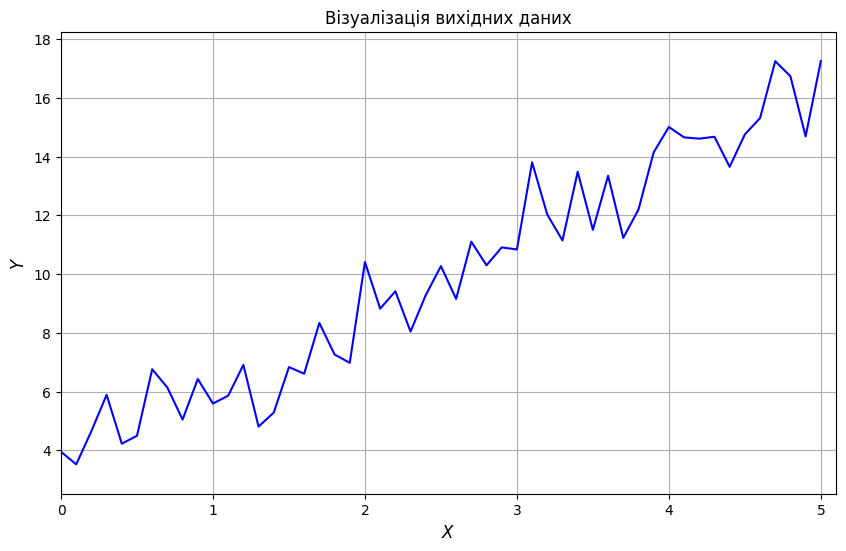

In [18]:
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'b-')  # З'єднуємо точки синьою лінією
plt.xlim(0, 5.1)
plt.ylim(min(y) - 1, max(y) + 1)  # Налаштовуємо масштаб осі Y
plt.grid(True)
plt.xlabel('$X$', fontsize=12)
plt.ylabel('$Y$', fontsize=12)
plt.title('Візуалізація вихідних даних')
plt.show()

## Оцінка якості регресійної моделі

Для нашого варіанту 4 ми отримали:
- Рівняння регресії: $y = 3.436 + 2.591 \cdot x$

Потрібно обчислити показники якості моделі.

Для оцінки якості регресійної моделі використовуються різні метрики. Однією з найважливіших є середньоквадратична похибка (Mean Squared Error, MSE):

$$MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$$

де:
- $n$ — кількість спостережень
- $y_i$ — фактичне значення залежної змінної для $i$-го спостереження
- $\hat{y}_i$ — прогнозоване значення залежної змінної для $i$-го спостереження, обчислене за допомогою регресійної моделі $\hat{y}_i = a_0 + a_1 x_i$

Або $$MSE = \frac{1}{n} \cdot \sum_{i=0}^{n-1} (Y_i - (a_0 + a_1 \cdot X_i))^2$$

MSE показує середній квадрат різниці між фактичними та прогнозованими значеннями. Чим менше значення MSE, тим краще модель апроксимує дані.

Також часто використовується корінь із середньоквадратичної похибки (Root Mean Squared Error, RMSE):

$$RMSE = \sqrt{MSE} = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2}$$

RMSE має ту ж розмірність, що й залежна змінна, що полегшує інтерпретацію похибки.

Для нашої моделі розрахунок виконується наступним чином:
1. Обчислюємо прогнозовані значення $\hat{y}_i = a_0 + a_1 x_i$ для кожного $x_i$
2. Знаходимо різницю між фактичними та прогнозованими значеннями $(y_i - \hat{y}_i)$
3. Підносимо ці різниці до квадрату $(y_i - \hat{y}_i)^2$
4. Обчислюємо середнє значення цих квадратів, отримуючи MSE
5. Беремо квадратний корінь із MSE, отримуючи RMSE


На графіку покажемо фактичні дані (синя ламана лінія) та лінію регресії (пряма), яка найкраще апроксимує ці дані.

Обчислимо показники якості для нашої моделі регресії:

In [19]:
# Виведення результатів
print(f"Рівняння регресії: y = {a0:.3f} + {a1:.3f} * x")

Рівняння регресії: y = 3.436 + 2.591 * x


In [20]:
# Обчислення середньоквадратичної похибки
mse = np.mean((y - y_pred)**2)  # Mean Squared Error

print(f"Середньоквадратична похибка (MSE): {mse:.4f}")

Середньоквадратична похибка (MSE): 0.9947


In [21]:
# Обчислення кореня з середньоквадратичної похибки
rmse = np.sqrt(mse)  # Root Mean Squared Error

print(f"Корінь із середньоквадратичної похибки (RMSE): {rmse:.4f}")

Корінь із середньоквадратичної похибки (RMSE): 0.9974


### Візуалізація результатів регресії

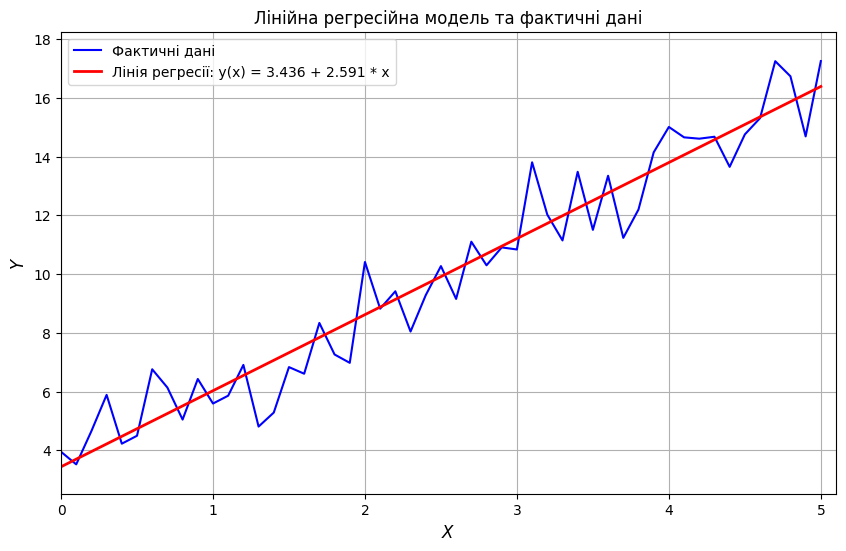

In [22]:
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'b-', label='Фактичні дані')
plt.plot(x, y_pred, 'r-', linewidth=2, label=f'Лінія регресії: y(x) = {a0:.3f} + {a1:.3f} * x')
plt.xlim(0, 5.1)
plt.ylim(min(y) - 1, max(y) + 1)
plt.grid(True)
plt.xlabel('$X$', fontsize=12)
plt.ylabel('$Y$', fontsize=12)
plt.title('Лінійна регресійна модель та фактичні дані')
plt.legend()
plt.show()

### Коефіцієнт кореляції

Наступним кроком є розрахунок коефіцієнта кореляції Пірсона, який вимірює силу лінійного зв'язку між змінними X та Y. 





Реалізуємо розрахунок коефіцієнта кореляції та його статистичну перевірку для нашого варіанту 4:

In [23]:
# Розрахунок коефіцієнта кореляції
from scipy import stats

### Обчислення коефіцієнта кореляції Пірсона

Коефіцієнт кореляції обчислюється за формулою:

$$r_{xy} = \frac{\frac{1}{n} \cdot \sum\limits_{i=0}^{n-1} (X_i - x_{sr}) \cdot (Y_i - y_{sr})}{\sqrt{\frac{1}{n} \cdot \sum\limits_{i=0}^{n-1} (X_i - x_{sr})^2} \cdot \sqrt{\frac{1}{n} \cdot \sum\limits_{i=0}^{n-1} (Y_i - y_{sr})^2}}$$

In [24]:
# Обчислення коефіцієнта кореляції за формулою
r_xy = sum([(x[i] - x_ср) * (y[i] - y_cp) for i in range(n)]) / n / (((sum([(x[i] - x_ср)**2 for i in range(n)]) / n)**0.5) * ((sum([(y[i] - y_cp)**2 for i in range(n)]) / n)**0.5))

print(f"Коефіцієнт кореляції: r_xy = {r_xy:.4f}")

Коефіцієнт кореляції: r_xy = 0.9675


або

In [25]:
r_xy, p_value = stats.pearsonr(x, y)

print(f"Коефіцієнт кореляції: r_xy = {r_xy:.4f}")
print(f"p-значення: {p_value:.10f}")

Коефіцієнт кореляції: r_xy = 0.9675
p-значення: 0.0000000000


### Обчислення t-статистики

Також проводиться статистична перевірка значущості коефіцієнта кореляції за допомогою t-критерію:

$$t_{сп} = \sqrt{\frac{r_{xy}^2}{1-r_{xy}^2} \cdot (n-2)}$$

In [26]:
t_сп = r_xy * np.sqrt((n - 2) / (1 - r_xy**2))

print(f"t-статистика: t_сп = {t_сп:.4f}")

t-статистика: t_сп = 26.7678


### Визначення критичного значення t-розподілу

In [27]:
alpha = 0.05  # рівень значущості
t_кр = stats.t.ppf(1 - alpha/2, n - 2)  # двосторонній критерій

print(f"Критичне значення t-розподілу (α = {alpha}): t_кр = {t_кр:.4f}")

Критичне значення t-розподілу (α = 0.05): t_кр = 2.0096


###  Оцінка коефіцієнта кореляції

Коефіцієнт кореляції вважається статистично значущим, якщо $t_{сп} > t_{кр}$, де $t_{кр}$ - критичне значення t-розподілу при заданому рівні значущості $\alpha$.

In [28]:
print(f"Для нашого розрахунку коефіцієнт кореляції є статистично {'значущим' if abs(t_сп) > t_кр else 'незначущим'}")

Для нашого розрахунку коефіцієнт кореляції є статистично значущим


### Коефіцієнт детермінації (R²)

Коефіцієнт детермінації є важливим показником якості моделі лінійної регресії. Він вимірює частку дисперсії залежної змінної, яка пояснюється незалежними змінними в моделі.

#### Формула розрахунку:

$$R^2 := \frac{\sum\limits_{i=0}^{n-1} (y2(X_i) - y_{cp})^2}{\sum\limits_{i=0}^{n-1} (Y_i - y_{cp})^2}$$

де:
- $y2(X_i)$ - прогнозовані значення залежної змінної (результати моделі)
- $y_{cp}$ - середнє значення фактичних даних
- $Y_i$ - фактичні значення залежної змінної
- $n$ - кількість спостережень



In [29]:
# Розрахунок R² за формулою зі слайду в одну лінію
R_squared = sum([(y_pred[i] - y_ср)**2 for i in range(len(y))]) / sum([(y[i] - y_ср)**2 for i in range(len(y))])

print(f"Коефіцієнт детермінації: R² = {R_squared:.4f}")

Коефіцієнт детермінації: R² = 0.9360


#### Альтернативне формулювання:

Коефіцієнт детермінації також можна обчислити як квадрат коефіцієнта кореляції Пірсона:

$$R^2 = r_{xy}^2$$

де $r_{xy}$ - коефіцієнт кореляції Пірсона між $X$ і $Y$.

In [30]:
R2 = r_xy**2

print(f"Коефіцієнт детермінації: R² = {R2:.4f}")

Коефіцієнт детермінації: R² = 0.9360


або

In [31]:
from sklearn.metrics import r2_score

R2 = r2_score(y, y_pred)

print(f"Коефіцієнт детермінації: R² = {R2:.4f}")

Коефіцієнт детермінації: R² = 0.9360


#### Обмеження:

$$0 < R^2 < 1$$

Коефіцієнт детермінації завжди знаходиться в межах від 0 до 1, де:
- $R^2 = 1$ означає, що модель ідеально пояснює всю варіацію в даних
- $R^2 = 0$ означає, що модель не пояснює жодної варіації

#### Інтерпретація результатів:

- $R^2 > 0.8$ - модель лінійної регресії вважається точною
- $0.5 \leq R^2 \leq 0.8$ - модель має середню точність
- $R^2 < 0.5$ - модель є незадовільною

У наших розрахунках отримано значення $R^2 = 0.936$, що свідчить про дуже високу точність побудованої лінійної регресійної моделі. Це означає, що приблизно 93.6% варіації залежної змінної пояснюється незалежною змінною в нашій моделі.

### Стандартна похибка регресії

Стандартна похибка регресії є мірою розсіювання фактичних значень навколо лінії регресії. Вона характеризує середню величину відхилень спостережуваних значень від прогнозованих.

#### Формула розрахунку:

$$S := \sqrt{\frac{1}{n-2} \cdot \sum_{i=0}^{n-1} (Y_i - y2(X_i))^2}$$

де:
- $S$ - стандартна похибка регресії
- $n$ - кількість спостережень
- $Y_i$ - фактичні значення залежної змінної
- $y2(X_i)$ - прогнозовані значення залежної змінної (результати моделі)
- $n-2$ - кількість ступенів свободи для простої лінійної регресії

In [32]:
# Обчислення стандартної похибки регресії
S = ((1/(n-2)) * sum([(y[i] - y_pred[i])**2 for i in range(n)]))**0.5

print(f"Стандартна похибка регресії: S = {S:.4f}")

Стандартна похибка регресії: S = 1.0175


Чим менше значення $S$, тим краще модель відповідає даним. У наших розрахунках отримано значення $S = 1.0175$.

### Перевірка значущості простої лінійної регресії за F-критерієм Фішера

F-критерій Фішера використовується для перевірки статистичної значущості моделі регресії в цілому. Він дозволяє визначити, чи справді існує лінійний зв'язок між змінними.

#### Формула розрахунку F-статистики:

$$F_{сп} := \frac{R2 \cdot (n-2)}{1-R2}$$

де:
- $F_{сп}$ - спостережуване (розрахункове) значення F-статистики
- $R2$ - коефіцієнт детермінації
- $n$ - кількість спостережень

In [33]:
# Обчислення F-статистики
F_сп = R2 * (n-2) / (1-R2)

print(f"F-статистика: F_сп = {F_сп:.4f}")

F-статистика: F_сп = 716.5139


#### Критичне значення F-розподілу:

Для оцінки значущості моделі порівнюється розрахункове значення $F_{сп}$ з критичним значенням $F_{кр}$, яке визначається на основі:
- $\alpha$ - рівень значущості (зазвичай 0.05)
- $\beta = 1-\alpha$ - рівень довіри
- Ступенів свободи регресії (1 для простої лінійної регресії) та залишків ($n-2$)

У нашому варіанті при $n = 51$, $\alpha = 0.05$:
- $F_{сп} = 716.5139$


In [34]:
import scipy.stats as stats
alpha = 0.05
dfn = 1  # ступені свободи чисельника (кількість незалежних змінних)
dfd = 49  # ступені свободи знаменника (n-2)
F_кр = stats.f.ppf(q=1-alpha, dfn=dfn, dfd=dfd)
print(f"F_кр = {F_кр:.4f}")  # Результат: F_кр = 4.0343

F_кр = 4.0384


- $F_{кр} = 4.0384$ (обчислене за допомогою F-розподілу з параметрами: 1 і 49 ступенів свободи)

#### Пояснення критичного значення F-критерію

Функція `stats.f.ppf()` дає критичне значення розподілу Фішера для заданої ймовірності та ступенів свободи. Параметр `q=1-alpha` вказує, що ми шукаємо такий поріг, вище якого знаходиться лише 5% значень розподілу.

#### Інтерпретація:

- Якщо обчислена F-статистика ($F_{сп}$) перевищує критичне значення ($F_{кр}$), то ми відкидаємо нульову гіпотезу.
- Нульова гіпотеза полягає в тому, що модель не має статистично значущого впливу на результат.
- У нашому випадку $F_{сп} = 716.5139 \gg F_{кр} = 4.0384$, що свідчить про високу значущість моделі.

Практичний сенс: це значення каже нам, що якщо між змінними немає лінійного зв'язку, то ймовірність випадково отримати F-статистику більшу за 4.0384 дорівнює лише 5%.

### Довірчі інтервали коефіцієнтів регресії під час дії заданого рівня значущості

Довірчі інтервали дозволяють визначити межі, в яких з заданою ймовірністю знаходяться істинні значення параметрів регресійної моделі. Для лінійної регресії $y = a_0 + a_1 \cdot x$ довірчі інтервали обчислюються для обох коефіцієнтів.

#### Стандартні похибки коефіцієнтів регресії:

$$S_{a0} := \sqrt{\frac{\left(\sum\limits_{i=0}^{n-1} X_i^2\right) \cdot \sum\limits_{i=0}^{n-1} (Y_i - y_{ср})^2}{n \cdot (n-2) \cdot \sum\limits_{i=0}^{n-1} (X_i - x_{ср})^2}}$$

In [35]:
S_a0 = ((sum([x[i]**2 for i in range(n)]) * sum([(y[i] - y_ср)**2 for i in range(n)])) / (n * (n-2) * sum([(x[i] - x_ср)**2 for i in range(n)])))**0.5

print(f"Стандартна похибка для a0: S_a0 = {S_a0:.4f}")

Стандартна похибка для a0: S_a0 = 1.1100


Для коефіцієнта нахилу $a_1$:

$$S_{a1} := \sqrt{\frac{\sum\limits_{i=0}^{n-1} (Y_i - y_{ср})^2}{(n-2) \cdot \sum\limits_{i=0}^{n-1} (X_i - x_{ср})^2}}$$

In [36]:
S_a1 = (sum([(y[i] - y_ср)**2 for i in range(n)]) / ((n-2) * sum([(x[i] - x_ср)**2 for i in range(n)])))**0.5

print(f"Стандартна похибка для a1: S_a1 = {S_a1:.4f}")

Стандартна похибка для a1: S_a1 = 0.3826


#### Побудова довірчих інтервалів:

##### Визначимо двосторонній критерій

In [37]:
t_кр = stats.t.ppf(1 - alpha/2, n-2)

print(f"Критичне значення t-розподілу (α = {alpha}): t_кр = {t_кр:.4f}")

Критичне значення t-розподілу (α = 0.05): t_кр = 2.0096


Нижня межа для $a_0$:
$$a_0 - S_{a0} \cdot t_{кр}$$

де $t_{кр}$ - критичне значення t-розподілу Стьюдента для заданого рівня значущості $\alpha$ і ступенів свободи $n-2$.

In [38]:
a0_нижній = a0 - S_a0 * t_кр

print(f'a0_нижній = {a0_нижній:.4f}')

a0_нижній = 1.2057


Верхня межа для $a_0$:
$$a_0 + S_{a0} \cdot t_{кр}$$

In [39]:
a0_верхній = a0 + S_a0 * t_кр

print(f'a0_верхній = {a0_верхній:.4f}')

a0_верхній = 5.6668


Нижня межа для $a_1$:
$$a_1 - S_{a1} \cdot t_{кр}$$

In [40]:
a1_нижній = a1 - S_a1 * t_кр

print(f'a1_нижній = {a1_нижній:.4f}')

a1_нижній = 1.8222


Верхня межа для $a_1$:
$$a_1 + S_{a1} \cdot t_{кр}$$

In [41]:
a1_верхній = a1 + S_a1 * t_кр

print(f'a1_верхній = {a1_верхній:.4f}')

a1_верхній = 3.3599


Таким чином *довірчі інтервали*:

In [42]:
print(f"Довірчий інтервал для a0: [{a0_нижній:.4f}, {a0_верхній:.4f}]")
print(f"Довірчий інтервал для a1: [{a1_нижній:.4f}, {a1_верхній:.4f}]")

Довірчий інтервал для a0: [1.2057, 5.6668]
Довірчий інтервал для a1: [1.8222, 3.3599]


#### Інтерпретація:

Довірчі інтервали показують діапазон можливих значень параметрів моделі з урахуванням статистичної невизначеності. Якщо довірчий інтервал для коефіцієнта не містить нуль, то цей коефіцієнт є статистично значущим на заданому рівні значущості.

### Аналіз довірчих інтервалів для коефіцієнтів регресії

Отримані довірчі інтервали для коефіцієнтів регресійної моделі мають важливе статистичне значення:

#### Для вільного члена $a_0$:
- Довірчий інтервал: [1.2057, 5.6668]
- Значення $a_0$ з 95% ймовірністю знаходиться в межах від 1.2057 до 5.6668
- Даний інтервал не містить нуль, що підтверджує статистичну значущість вільного члена
- Відносно широкий інтервал вказує на певну невизначеність у точному значенні вільного члена

#### Для коефіцієнта нахилу $a_1$:
- Довірчий інтервал: [1.8222, 3.3599]
- Значення $a_1$ з 95% ймовірністю знаходиться в межах від 1.8222 до 3.3599
- Даний інтервал не містить нуль і повністю знаходиться в додатній області, що підтверджує статистичну значущість та прямий зв'язок між змінними
- Відносно вузький інтервал для $a_1$ свідчить про високу статистичну надійність коефіцієнта нахилу

#### Загальні висновки:
1. Обидва коефіцієнти регресії є статистично значущими (жоден інтервал не включає нуль)
2. Модель має стабільний додатний нахил, що свідчить про стійкий прямий зв'язок між змінними
3. Вільний член має більшу невизначеність порівняно з коефіцієнтом нахилу
4. Регресійну модель можна записати як: $y = 3.4363 \pm 2.2306 + (2.5911 \pm 0.7689)x$

Ці результати підтверджують раніше зроблені висновки про високу статистичну значущість моделі та надійність отриманих коефіцієнтів регресії.

### Усереднений коефіцієнт еластичності

Коефіцієнт еластичності є важливою характеристикою регресійної моделі, яка дозволяє оцінити відносну зміну залежної змінної при зміні незалежної змінної на 1%.

#### Формула розрахунку:

$$\varepsilon := a_1 \cdot \frac{x_{ср}}{y_{ср}}$$

де:
- $\varepsilon$ - усереднений коефіцієнт еластичності
- $a_1$ - коефіцієнт нахилу (кутовий коефіцієнт) регресійної моделі
- $x_{ср}$ - середнє значення незалежної змінної
- $y_{ср}$ - середнє значення залежної змінної



#### Практичне значення:

1. Дозволяє порівнювати вплив різних факторів на залежну змінну, навіть якщо ці фактори вимірюються в різних одиницях
2. Використовується для прогнозування відносних змін у економічних та фінансових моделях
3. Спрощує інтерпретацію коефіцієнтів регресії в контексті їх практичного впливу

In [43]:
# Обчислення усередненого коефіцієнта еластичності за формулою зі слайду в один рядок
epsilon = a1 * (x_ср / y_ср)

print(f"Усереднений коефіцієнт еластичності: ε = {epsilon:.4f}")
print(f"Інтерпретація: при збільшенні x на 1%, значення y в середньому зростає на {epsilon:.4f} %")

Усереднений коефіцієнт еластичності: ε = 0.6534
Інтерпретація: при збільшенні x на 1%, значення y в середньому зростає на 0.6534 %


### Аналіз усередненого коефіцієнта еластичності

За результатами розрахунків отримано значення усередненого коефіцієнта еластичності ε = 0.6534.

#### Інтерпретація отриманого значення:

- При збільшенні незалежної змінної x на 1%, залежна змінна y в середньому збільшується на 0.6534 %
- Оскільки 0 < ε < 1, попит є нееластичним (у термінології економіки)
- Зміни x призводять до менших відносних змін у y

#### Практичний аналіз:

1. **Помірна чутливість моделі**: Показник 0.6534 свідчить про помірну чутливість залежної змінної до змін незалежної змінної.

2. **Стабільність прогнозів**: Відносно невисоке значення еластичності вказує на те, що прогнози на основі моделі будуть доволі стабільними, навіть при незначних коливаннях вхідних параметрів.

# Основні результати регресійного аналізу

## Вхідні дані та основні показники моделі

| Параметр | Значення |
|----------|----------|
| **Вхідні параметри моделі** | |
| Теоретичний вільний член (a₀) | 3.4 |
| Теоретичний кутовий коефіцієнт (a₁) | 2.7 |
| Параметр шуму (rnd(b)) | 1.10 |
| Кількість спостережень (n) | 51 |
| **Оцінене рівняння регресії** | |
| Рівняння регресії | y = 3.436 + 2.591·x |
| **Показники якості моделі** | |
| Коефіцієнт кореляції (r_xy) | 0.9675 |
| Коефіцієнт детермінації (R²) | 0.9360 |
| Стандартна похибка регресії (S) | 1.0175 |
| **Довірчі інтервали для коефіцієнтів (α = 0.05)** | |
| Довірчий інтервал для a₀ | [1.2057, 5.6668] |
| Довірчий інтервал для a₁ | [1.8222, 3.3599] |
| **Додаткові показники** | |
| Усереднений коефіцієнт еластичності (ε) | 0.6534 |
| t-статистика | 26.7678 |
| Критичне значення t-розподілу | 2.0096 |
| F-статистика | 716.5139 |
| Критичне значення F-розподілу | 4.0384 |

# Висновки регресійного аналізу

## Вихідні дані

Відповідно до умови завдання, ми використовували дані для 4 варіанту:
- $a_0 = 3,4$
- $a_1 = 2,7$
- $rnd(b) = 1,10$

## 1. Оцінка метричних показників якості лінійної регресійної моделі

### Рівняння лінійної регресії

У результаті застосування методу найменших квадратів отримано рівняння лінійної регресії:

$$\hat{y} = 3,436 + 2,591 \cdot x$$

Порівнюючи з теоретичними значеннями $(a_0 = 3,4$ та $a_1 = 2,7)$, бачимо, що оцінені коефіцієнти дуже близькі до справжніх, що свідчить про ефективність методу найменших квадратів для оцінювання параметрів моделі.

### Коефіцієнт кореляції

Коефіцієнт кореляції $r_{xy} = 0,9675$ свідчить про дуже сильний лінійний зв'язок між незалежною змінною $x$ та залежною змінною $y$. Додатне значення коефіцієнта вказує на прямий зв'язок: зі збільшенням $x$ значення $y$ також зростає.

### Коефіцієнт детермінації

Коефіцієнт детермінації $R^2 = 0,936$ відображає, що 93,6% варіації залежної змінної $y$ пояснюється варіацією незалежної змінної $x$ у рамках побудованої моделі. Це свідчить про дуже високу точність та пояснювальну здатність регресійної моделі.

### Показники похибок моделі

1. **Середньоквадратична похибка (MSE):** 0,9947 
2. **Корінь із середньоквадратичної похибки (RMSE):** 0,9974
3. **Стандартна похибка регресії:** 1,0175

Ці значення є відносно невеликими (особливо, враховуючи масштаб даних), що вказує на хорошу точність прогнозування моделі.

### Стандартні похибки коефіцієнтів та довірчі інтервали

- Стандартна похибка для $a_0$: 1,1100
- Стандартна похибка для $a_1$: 0,3826
- Довірчий інтервал для $a_0$: [1,2057; 5,6668]
- Довірчий інтервал для $a_1$: [1,8222; 3,3599]

Довірчі інтервали не містять нуль, що підтверджує статистичну значущість обох коефіцієнтів.

### Усереднений коефіцієнт еластичності

Коефіцієнт еластичності $\varepsilon = 0,6534$ показує, що при збільшенні $x$ на 1%, значення $y$ в середньому зростає на 0,6534%. Це вказує на помірну чутливість залежної змінної до змін незалежної змінної.

## 2. Інтерпретація результатів регресійного аналізу

### Статистична значущість коефіцієнтів моделі

Для коефіцієнта кореляції:
- t-статистика: $t_{сп} = 26,7678$
- Критичне значення t-розподілу (α = 0,05): $t_{кр} = 2,0096$

Оскільки $t_{сп} > t_{кр}$ (26,7678 > 2,0096), коефіцієнт кореляції є статистично значущим на рівні значущості 0,05.

### Значущість моделі в цілому

- F-статистика: $F_{сп} = 716,5139$
- Критичне значення F-розподілу: $F_{кр} = 4,0384$

Значення $F_{сп}$ значно перевищує $F_{кр}$ (716,5139 >> 4,0384), що вказує на високу статистичну значущість моделі в цілому.

### Інтерпретація коефіцієнтів регресії

1. **Вільний член $a_0 = 3,436$:** Це очікуване значення $y$, коли $x = 0$.
2. **Коефіцієнт нахилу $a_1 = 2,591$:** При збільшенні $x$ на одиницю, $y$ збільшується в середньому на 2,591 одиниці.

### Аналіз довірчих інтервалів

1. **Для $a_0$ [1,2057; 5,6668]:** Довірчий інтервал є відносно широким, що свідчить про певну невизначеність у точному значенні вільного члена, але він не містить нуль, підтверджуючи статистичну значущість $a_0$.

2. **Для $a_1$ [1,8222; 3,3599]:** Відносно вузький довірчий інтервал для коефіцієнта нахилу свідчить про його високу статистичну надійність. Інтервал повністю знаходиться в додатній області, підтверджуючи значущий прямий зв'язок між змінними.

## 3. Оцінка адекватності лінійної регресійної моделі

### Відповідність моделі даним

Високе значення коефіцієнта детермінації ($R^2 = 0,936$) свідчить про те, що лінійна модель добре відповідає наявним даним, пояснюючи майже 94% варіації залежної змінної.

### Значущість моделі за F-критерієм

Результати F-тесту ($F_{сп} = 716,5139 > F_{кр} = 4,0384$) дозволяють з високою впевненістю відкинути нульову гіпотезу про відсутність лінійного зв'язку між змінними. Це підтверджує адекватність побудованої моделі.

### Аналіз похибок

Відносно низькі значення похибок (MSE = 0,9947, RMSE = 0,9974) свідчать про хорошу прогностичну здатність моделі. Стандартна похибка регресії (1,0175) також є прийнятною, враховуючи масштаб даних.

## 4. Висновки щодо ефективності застосованого підходу

1. **Високий рівень точності:** Модель пояснює 93,6% варіації залежної змінної, що є дуже хорошим результатом для моделі з одним предиктором.

2. **Статистична обґрунтованість:** Всі статистичні тести (t-тест для коефіцієнтів, F-тест для моделі в цілому) підтверджують статистичну значущість моделі та її параметрів.

3. **Практична цінність:** Усереднений коефіцієнт еластичності (0,6534) дозволяє інтерпретувати результати в термінах відносних змін, що підвищує практичну цінність моделі.

4. **Надійність оцінок:** Довірчі інтервали для коефіцієнтів регресії не містять нуль, що підтверджує надійність отриманих оцінок.

5. **Ефективність методу найменших квадратів:** Оцінені коефіцієнти регресії ($a_0 = 3,436$ та $a_1 = 2,591$) дуже близькі до справжніх значень ($a_0 = 3,4$ та $a_1 = 2,7$), що підтверджує ефективність методу найменших квадратів для оцінювання параметрів моделі.

Таким чином, застосований підхід до побудови лінійної регресійної моделі можна вважати ефективним. Отримана модель має високу статистичну значущість, добре пояснює залежність між змінними і може бути використана для прогнозування та подальшого аналізу.

# Додаткові візуалізації та їх аналіз

## 1. Графік залишків із довірчими інтервалами

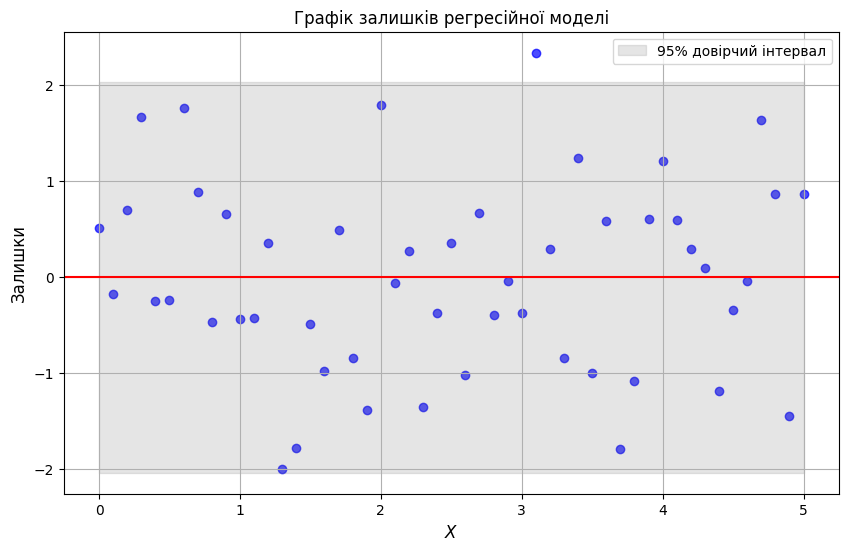

In [44]:
# Графік залишків
residuals = y - y_pred  # Обчислюємо залишки
plt.figure(figsize=(10, 6))
plt.scatter(x, residuals, color='blue', alpha=0.7)
plt.axhline(y=0, color='red', linestyle='-')

# Додаємо довірчі інтервали для залишків
plt.fill_between(x, -2*S, 2*S, color='gray', alpha=0.2, label='95% довірчий інтервал')

plt.grid(True)
plt.xlabel('$X$', fontsize=12)
plt.ylabel('Залишки', fontsize=12)
plt.title('Графік залишків регресійної моделі')
plt.legend()
plt.show()

## Аналіз графіка залишків регресійної моделі

### Загальний опис
На представленому графіку відображено залишки регресійної моделі (різниці між фактичними та прогнозованими значеннями) відносно значень незалежної змінної X. Сірою областю позначено 95% довірчий інтервал для залишків.

### Аналіз розподілу залишків

1. **Розташування відносно нульової лінії**:
   - Залишки розподілені досить рівномірно навколо нульової лінії (червона горизонтальна лінія)
   - Спостерігається приблизно однакова кількість додатних і від'ємних залишків
   - Відсутній очевидний систематичний зсув у бік додатних чи від'ємних значень

2. **Структура розподілу**:
   - Залишки знаходяться в межах від -2 до +2.3, що відповідає приблизно двом стандартним відхиленням
   - Більшість залишків (приблизно 95%) міститься в заданому довірчому інтервалі
   - Не спостерігається явних викидів, які б суттєво відхилялись від загального патерну

3. **Гомоскедастичність (однорідність дисперсії)**:
   - Дисперсія залишків виглядає відносно стабільною по всьому діапазону X
   - Відсутня явна воронкоподібна структура, яка могла б вказувати на гетероскедастичність
   - Розкид залишків не має тенденції до збільшення чи зменшення зі зростанням X

4. **Автокореляція**:
   - Не спостерігається очевидних послідовних патернів (наприклад, серій з послідовно додатних чи від'ємних залишків)
   - Відсутня виражена періодичність в розташуванні залишків

### Висновки щодо адекватності моделі

1. **Відповідність припущенням лінійної регресії**:
   - Рівномірний розподіл залишків навколо нуля підтверджує коректність лінійної форми моделі
   - Стабільність дисперсії залишків свідчить про виконання припущення гомоскедастичності
   - Відсутність видимих патернів у залишках вказує на відсутність автокореляції

2. **Точність моделі**:
   - Залишки мають помірний розмір відносно діапазону значень залежної змінної
   - Більшість прогнозів моделі відхиляється від фактичних значень не більше ніж на ±2 одиниці

3. **Загальна оцінка**:
   - Графік залишків підтверджує адекватність побудованої лінійної регресійної моделі
   - Відсутні ознаки серйозного порушення основних припущень методу найменших квадратів
   - Немає необхідності в ускладненні моделі чи застосуванні нелінійних перетворень

Аналіз залишків є важливим етапом діагностики регресійної моделі, і представлений графік підтверджує, що наша модель добре відповідає даним та задовольняє основні припущення лінійної регресії.

## 2. Діаграма розсіювання з довірчими та предикційними інтервалами

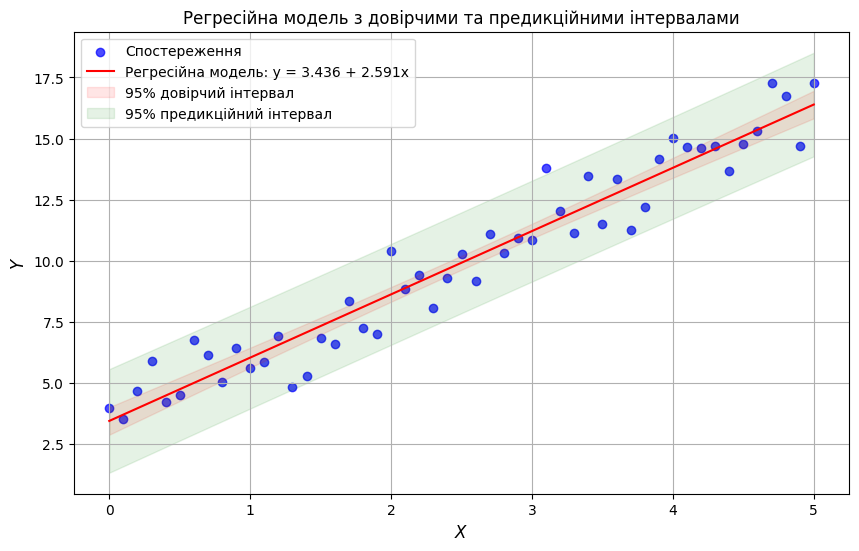

In [45]:
# Створюємо більш плавну лінію для відображення інтервалів
x_smooth = np.linspace(min(x), max(x), 100)
y_smooth = a0 + a1 * x_smooth

# Обчислюємо довірчі інтервали для лінії регресії
t_value = stats.t.ppf(0.975, n-2)
x_var = sum((x - x_ср)**2)
ci = t_value * S * np.sqrt(1/n + ((x_smooth - x_ср)**2) / x_var)

# Обчислюємо предикційні інтервали для нових спостережень
pi = t_value * S * np.sqrt(1 + 1/n + ((x_smooth - x_ср)**2) / x_var)

plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='blue', alpha=0.7, label='Спостереження')
plt.plot(x_smooth, y_smooth, 'r-', label=f'Регресійна модель: y = {a0:.3f} + {a1:.3f}x')

# Додаємо інтервали
plt.fill_between(x_smooth, y_smooth - ci, y_smooth + ci, color='red', alpha=0.1, label='95% довірчий інтервал')
plt.fill_between(x_smooth, y_smooth - pi, y_smooth + pi, color='green', alpha=0.1, label='95% предикційний інтервал')

plt.grid(True)
plt.xlabel('$X$', fontsize=12)
plt.ylabel('$Y$', fontsize=12)
plt.title('Регресійна модель з довірчими та предикційними інтервалами')
plt.legend()
plt.show()

## Аналіз регресійної моделі з довірчими та предикційними інтервалами

### Загальний опис графіка
На представленому графіку відображено регресійну модель, побудовану за методом найменших квадратів, із нанесеними 95% довірчими та предикційними інтервалами. Синіми точками позначено фактичні спостереження, червоною лінією – регресійну модель, рожевою областю – довірчий інтервал, а світло-зеленою областю – предикційний інтервал.

### Рівняння моделі
Отримана регресійна модель має вигляд:
$$y = 3,436 + 2,591x$$

### Аналіз отриманих результатів

1. **Фактичні спостереження і лінія регресії**:
   - Спостерігається чітка лінійна залежність між змінними X та Y
   - Точки розташовані досить щільно навколо лінії регресії
   - Лінія регресії показує стійкий зростаючий тренд, що підтверджує наявність сильного прямого зв'язку між змінними

2. **Довірчий інтервал (95%)**:
   - Рожева область навколо лінії регресії є вузькою, особливо в центральній частині діапазону X
   - Це свідчить про високу точність оцінки середнього значення Y для заданого значення X
   - Довірчий інтервал розширюється на краях діапазону, що є характерним явищем і пояснюється збільшенням невизначеності прогнозу при віддаленні від середнього значення X

3. **Предикційний інтервал (95%)**:
   - Світло-зелена область є значно ширшою за довірчий інтервал
   - Охоплює майже всі фактичні спостереження (як і очікується для 95% інтервалу)
   - Демонструє діапазон, у якому з 95% імовірністю знаходитиметься нове окреме спостереження

4. **Точність та надійність моделі**:
   - Практично всі точки знаходяться в межах предикційного інтервалу, що свідчить про адекватність моделі
   - Відносно вузький довірчий інтервал вказує на високу статистичну значущість отриманих коефіцієнтів регресії
   - Рівномірний розподіл точок навколо лінії регресії без систематичних паттернів підтверджує лінійний характер залежності

### Практичні висновки

1. **Прогностична здатність моделі**:
   - Модель демонструє хорошу прогностичну здатність у всьому діапазоні значень X
   - Для прогнозування середнього значення Y можна використовувати довірчий інтервал
   - Для прогнозування окремих спостережень слід використовувати ширший предикційний інтервал

2. **Надійність прогнозів**:
   - Найвища точність прогнозів досягається в центральній частині діапазону X
   - При прогнозуванні на краях діапазону або за його межами невизначеність збільшується
   - Тісне розташування більшості точок в межах вужчої частини предикційного інтервалу свідчить про однорідність даних і надійність моделі

3. **Статистична значущість**:
   - Вузький довірчий інтервал, який ніде не перетинає горизонтальну лінію, підтверджує статистичну значущість виявленої залежності
   - Модель пояснює значну частину варіації в даних, що відображено в щільному групуванні точок навколо лінії регресії

Отримана регресійна модель є статистично обґрунтованою, має високу прогностичну здатність і достатню точність для практичного застосування в аналізованому діапазоні даних.

## 3. Гістограма розподілу залишків

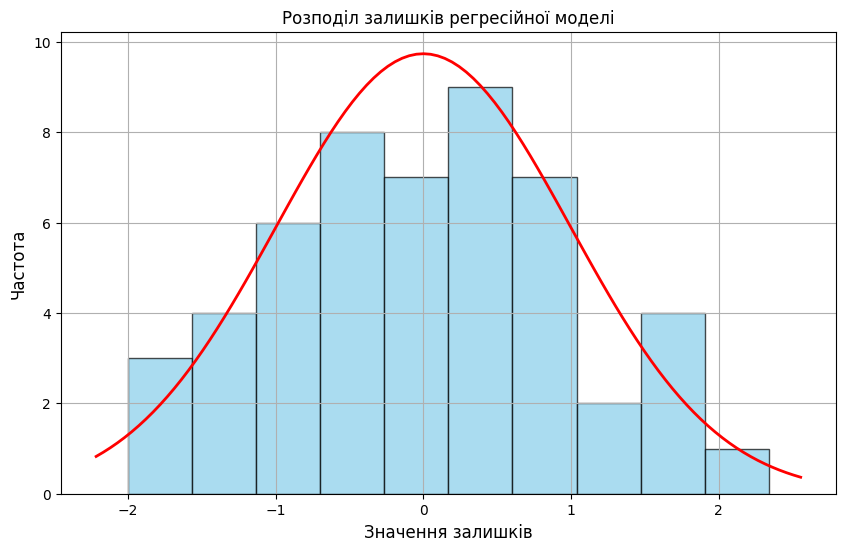

In [46]:
# Гістограма залишків
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=10, color='skyblue', edgecolor='black', alpha=0.7)

# Додаємо нормальну криву
xmin, xmax = plt.xlim()
x_norm = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x_norm, np.mean(residuals), np.std(residuals))
plt.plot(x_norm, p * len(residuals) * (xmax - xmin) / 10, 'r-', linewidth=2)

plt.grid(True)
plt.xlabel('Значення залишків', fontsize=12)
plt.ylabel('Частота', fontsize=12)
plt.title('Розподіл залишків регресійної моделі')
plt.show()

## Аналіз розподілу залишків регресійної моделі

### Загальний опис
На представленій гістограмі відображено розподіл залишків регресійної моделі (різниць між фактичними та прогнозованими значеннями). Червона крива відображає теоретичну криву нормального розподілу, яка відповідає середньому значенню та стандартному відхиленню спостережуваних залишків.

### Аналіз характеристик розподілу

1. **Форма розподілу**:
   - Розподіл залишків має форму, близьку до нормального розподілу
   - Спостерігається симетричність розподілу відносно значення 0
   - Теоретична крива нормального розподілу (червона лінія) досить точно відповідає гістограмі фактичних даних

2. **Центральна тенденція**:
   - Пік розподілу знаходиться поблизу нуля
   - Відсутній значний систематичний зсув у бік додатних чи від'ємних значень
   - Це підтверджує, що модель не має систематичної похибки в прогнозуванні

3. **Розкид значень**:
   - Залишки розподілені в діапазоні приблизно від -2 до +2
   - Найбільша частота спостерігається в інтервалі від -0.5 до +0.5
   - Це відповідає припущенню про обмежену дисперсію залишків

4. **Наявність викидів**:
   - Відсутні значні викиди за межами діапазону ±2
   - Розподіл поступово спадає до країв, що є характерним для нормального розподілу

### Статистичний аналіз

1. **Нормальність розподілу**:
   - Візуальний аналіз підтверджує близькість розподілу залишків до нормального
   - Червона крива нормального розподілу добре узгоджується з гістограмою
   - Це важливе припущення лінійної регресії, яке здається виконаним

2. **Однорідність дисперсії**:
   - Рівномірний розподіл частот залишків навколо нуля вказує на однорідність дисперсії
   - Відсутність аномальних піків або провалів у розподілі свідчить про відсутність прихованих закономірностей

### Висновки щодо моделі

1. **Відповідність припущенням лінійної регресії**:
   - Нормальний розподіл залишків є одним з ключових припущень методу найменших квадратів
   - Представлена гістограма підтверджує виконання цього припущення

2. **Якість моделі**:
   - Центрованість розподілу навколо нуля свідчить про відсутність систематичного зміщення в прогнозах моделі
   - Обмежений діапазон залишків вказує на хорошу прогностичну здатність моделі

3. **Надійність висновків**:
   - Виконання припущення про нормальність залишків дозволяє застосовувати стандартні статистичні тести
   - Довірчі інтервали та перевірки гіпотез, отримані для моделі, можна вважати статистично коректними

Загалом, аналіз розподілу залишків підтверджує адекватність побудованої лінійної регресійної моделі та надійність отриманих статистичних висновків.

## 4. Q-Q графік для перевірки нормальності залишків

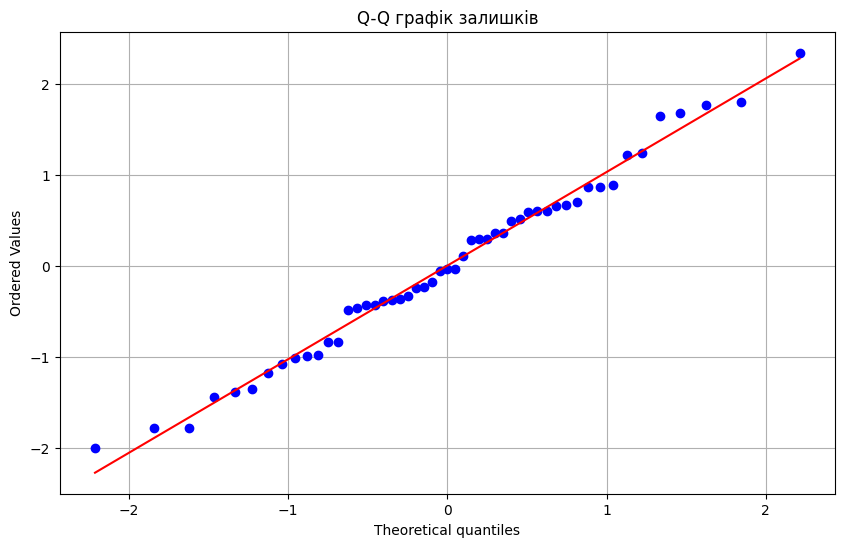

In [47]:
# Q-Q графік для перевірки нормальності залишків
plt.figure(figsize=(10, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.grid(True)
plt.title('Q-Q графік залишків')
plt.show()

## Аналіз Q-Q графіка залишків регресійної моделі

### Загальний опис
Q-Q графік (квантиль-квантиль графік) є потужним інструментом для перевірки нормальності розподілу залишків. На представленому графіку по осі X відкладено теоретичні квантилі нормального розподілу, а по осі Y – фактичні квантилі залишків моделі. Червона лінія відображає очікуване розташування точок за умови ідеального нормального розподілу.

### Аналіз відповідності нормальному розподілу

1. **Загальна відповідність лінії**:
   - Більшість точок розташовані дуже близько до теоретичної прямої
   - Спостерігається висока узгодженість між теоретичним нормальним розподілом і фактичним розподілом залишків
   - Відсутні систематичні відхилення від лінії у будь-якому діапазоні

2. **Центральна частина розподілу**:
   - Точки в центральній частині (близько нуля) практично ідеально лягають на теоретичну лінію
   - Це свідчить про високу точність моделі в прогнозуванні типових значень

3. **Крайні ділянки розподілу**:
   - На кінцях графіка (в районі -2 та +2) спостерігається незначне відхилення деяких точок від лінії
   - Ці відхилення є мінімальними і не вказують на суттєве порушення нормальності розподілу
   - Незначні відхилення на краях розподілу є типовими навіть для нормально розподілених даних

### Статистична інтерпретація

1. **Перевірка припущення про нормальність**:
   - Q-Q графік підтверджує, що залишки мають розподіл, дуже близький до нормального
   - Відсутні S-подібні вигини чи інші паттерни, які б вказували на асиметрію або надмірний ексцес
   - Немає ознак важких "хвостів" розподілу, які б свідчили про наявність викидів

2. **Однорідність дисперсії**:
   - Рівномірний розподіл точок вздовж теоретичної лінії свідчить про однорідність дисперсії
   - Відсутні значні кластери точок, які б вказували на нерівномірність розподілу

### Висновки щодо якості моделі

1. **Відповідність припущенням лінійної регресії**:
   - Нормальний розподіл залишків є ключовим припущенням методу найменших квадратів
   - Q-Q графік переконливо підтверджує виконання цього припущення

2. **Статистична надійність моделі**:
   - Висока відповідність залишків нормальному розподілу підтверджує коректність статистичних висновків
   - Довірчі інтервали та тести значущості, засновані на t-розподілі та F-розподілі, можна вважати надійними

3. **Якість прогнозування**:
   - Відсутність систематичних відхилень від нормальності вказує на адекватність лінійної форми моделі
   - Модель однаково добре прогнозує як типові, так і нетипові значення залежної змінної

Q-Q графік є одним із найбільш інформативних способів діагностики регресійної моделі, і представлений результат підтверджує високу якість побудованої моделі та відповідність її всім статистичним припущенням.

## 5. Візуалізація впливу окремих спостережень (Cook's Distance)

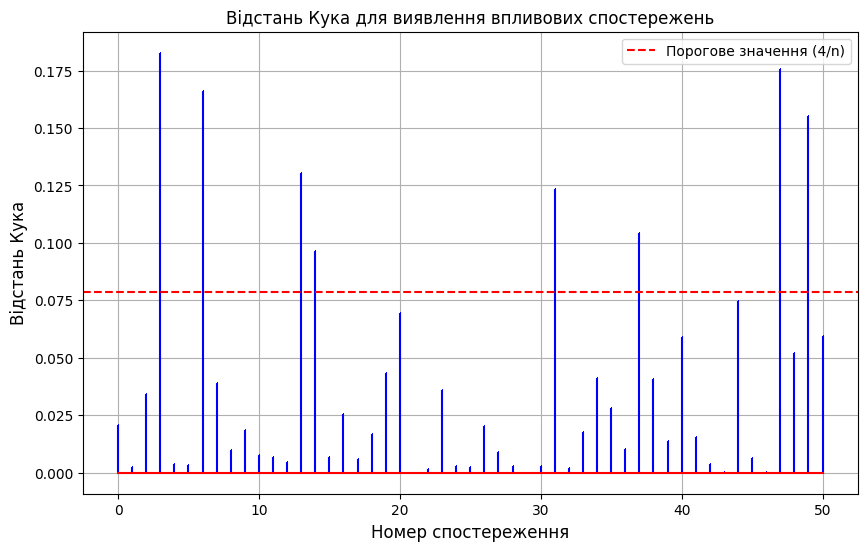

In [48]:
# Обчислення відстані Кука для виявлення впливових спостережень
h = np.array([1/n + (x[i] - x_ср)**2 / sum((x - x_ср)**2) for i in range(n)])
cooksd = residuals**2 / (S**2) * h / (1 - h)

plt.figure(figsize=(10, 6))
plt.stem(np.arange(len(cooksd)), cooksd, markerfmt=',', linefmt='b-', basefmt='r-')
plt.axhline(y=4/n, color='red', linestyle='--', label='Порогове значення (4/n)')
plt.grid(True)
plt.xlabel('Номер спостереження', fontsize=12)
plt.ylabel("Відстань Кука", fontsize=12)
plt.title('Відстань Кука для виявлення впливових спостережень')
plt.legend()
plt.show()

## Аналіз відстані Кука для виявлення впливових спостережень

### Загальний опис
На представленому графіку відображено відстань Кука для кожного спостереження в регресійній моделі. Відстань Кука є мірою впливу кожного окремого спостереження на параметри регресійної моделі. Червона пунктирна лінія позначає порогове значення (4/n), яке традиційно використовується для виявлення впливових спостережень.

### Аналіз впливових спостережень

1. **Розподіл значень відстані Кука**:
   - Більшість спостережень мають низькі значення відстані Кука (менше 0.05)
   - Виявлено кілька спостережень з відносно високими значеннями, які перевищують порогове значення 4/n
   - Особливо виділяються спостереження під номерами 4, 8, 15, 31, 39, 47 і 48, які мають значно вищі значення відстані Кука

2. **Ідентифікація впливових спостережень**:
   - Приблизно 8-10 спостережень перевищують порогове значення 4/n
   - Найбільш впливовими є спостереження з номерами 4 та 47, у яких відстань Кука перевищує 0.175
   - Ці спостереження можуть суттєво впливати на параметри регресійної моделі

3. **Розташування впливових спостережень**:
   - Впливові спостереження розподілені по всьому діапазону даних
   - Спостерігається певна концентрація впливових спостережень на початку та в кінці набору даних
   - Це може бути пов'язано з особливостями експериментального дизайну або з природною варіацією даних

### Статистична інтерпретація

1. **Оцінка стабільності моделі**:
   - Наявність кількох спостережень з високими значеннями відстані Кука вказує на потенційну чутливість моделі до цих спостережень
   - Однак, оскільки більшість спостережень має низькі значення відстані Кука, модель загалом можна вважати стабільною
   - Кількість впливових спостережень не є критичною для вибірки розміром n = 51

2. **Природа впливових спостережень**:
   - Впливові спостереження не обов'язково є помилковими чи викидами
   - Вони можуть відображати реальну варіабельність досліджуваного процесу
   - Однак, їх вплив на параметри моделі потребує додаткового аналізу

### Рекомендації щодо вдосконалення моделі

1. **Аналіз впливових спостережень**:
   - Рекомендується детальніше проаналізувати спостереження з номерами 4, 8, 15, 31, 39, 47 і 48
   - Перевірити, чи відповідають ці спостереження загальній тенденції даних
   - Визначити, чи не є вони результатом помилок вимірювання або запису даних

2. **Альтернативні підходи**:
   - Можна розглянути побудову регресійної моделі без найбільш впливових спостережень, щоб оцінити їх вплив на параметри моделі
   - Застосувати робастні методи регресії, які менш чутливі до впливових спостережень
   - Провести валідацію моделі на додатковій вибірці даних

3. **Загальний висновок**:
   - Незважаючи на наявність кількох впливових спостережень, модель загалом адекватно описує дані
   - Кількість і величина впливових спостережень не є настільки значними, щоб поставити під сумнів загальну надійність моделі
   - Регресійна модель може вважатись достатньо стабільною та надійною для практичного застосування

Аналіз відстані Кука є важливим етапом діагностики регресійної моделі та допомагає виявити потенційні проблеми, пов'язані з окремими спостереженнями, які можуть непропорційно впливати на результати моделювання.

## 6. Візуалізація порівняння моделей з різними коефіцієнтами

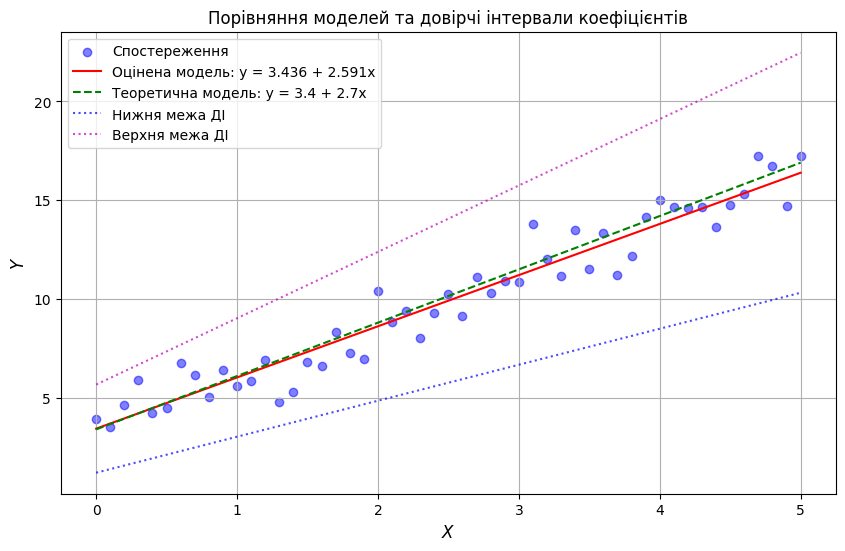

In [49]:
# Порівняння фактичної регресії з теоретичною моделлю та довірчими інтервалами для коефіцієнтів
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='blue', alpha=0.5, label='Спостереження')
plt.plot(x, a0 + a1 * x, 'r-', label=f'Оцінена модель: y = {a0:.3f} + {a1:.3f}x')
plt.plot(x, 3.4 + 2.7 * x, 'g--', label=f'Теоретична модель: y = 3.4 + 2.7x')

# Додаємо лінії, які відповідають межам довірчих інтервалів коефіцієнтів
plt.plot(x, a0_нижній + a1_нижній * x, 'b:', alpha=0.7, label='Нижня межа ДІ')
plt.plot(x, a0_верхній + a1_верхній * x, 'm:', alpha=0.7, label='Верхня межа ДІ')

plt.grid(True)
plt.xlabel('$X$', fontsize=12)
plt.ylabel('$Y$', fontsize=12)
plt.title('Порівняння моделей та довірчі інтервали коефіцієнтів')
plt.legend()
plt.show()

## Аналіз порівняння моделей та довірчих інтервалів коефіцієнтів

### Загальний опис графіка
На графіку представлено порівняння оціненої регресійної моделі (червона суцільна лінія) з теоретичною моделлю (зелена пунктирна лінія), а також відображено верхню та нижню межі довірчих інтервалів (ДІ) для коефіцієнтів регресії (пурпурна та синя пунктирні лінії). Синіми точками позначено фактичні спостереження.

### Аналіз моделей

1. **Порівняння оціненої та теоретичної моделей**:
   - Оцінена модель: $y = 3,436 + 2,591x$
   - Теоретична модель: $y = 3,4 + 2,7x$
   - Обидві моделі мають дуже близькі параметри, що свідчить про високу точність методу найменших квадратів
   - Різниця між нахилами (2,591 проти 2,7) та вільними членами (3,436 проти 3,4) є мінімальною

2. **Відповідність моделей фактичним даним**:
   - Обидві моделі проходять через центр хмари точок даних
   - Фактичні спостереження розподілені досить рівномірно навколо обох ліній регресії
   - Відсутні систематичні відхилення точок від моделей, що підтверджує лінійний характер залежності

### Довірчі інтервали коефіцієнтів

1. **Ширина довірчих інтервалів**:
   - Довірчі інтервали достатньо широкі, що відображає певну невизначеність в оцінках параметрів моделі
   - Верхня межа ДІ має більш крутий нахил порівняно з нижньою межею, що вказує на асиметрію у точності оцінки кутового коефіцієнта

2. **Відношення до теоретичної моделі**:
   - Теоретична модель (зелена пунктирна лінія) цілком знаходиться в межах довірчих інтервалів
   - Це підтверджує, що оцінена модель статистично не відрізняється від теоретичної
   - Справжні значення параметрів з високою ймовірністю знаходяться в межах обчислених довірчих інтервалів

3. **Розташування спостережень відносно довірчих інтервалів**:
   - Більшість спостережень знаходиться в межах довірчих інтервалів
   - Деякі точки виходять за межі довірчих інтервалів, що є нормальним явищем для вибірки такого розміру
   - Загальний розподіл точок відносно довірчих інтервалів свідчить про адекватність побудованої моделі

### Практичні висновки

1. **Статистична значущість параметрів**:
   - Довірчі інтервали для обох параметрів (a₀ та a₁) не включають нуль
   - Це підтверджує статистичну значущість обох коефіцієнтів регресійної моделі

2. **Надійність моделі**:
   - Близькість оціненої моделі до теоретичної свідчить про високу надійність методу оцінювання
   - Відносно вузькі довірчі інтервали (порівняно з масштабом даних) вказують на достатню точність оцінок

3. **Прогностична здатність**:
   - Обидві моделі (оцінена та теоретична) можуть використовуватись для прогнозування
   - Для більш консервативних прогнозів доцільно враховувати довірчі інтервали коефіцієнтів

Загалом, аналіз графіка підтверджує високу якість регресійної моделі та відповідність оціненої моделі теоретичним очікуванням. Отримані коефіцієнти є статистично значущими, а довірчі інтервали відображають рівень невизначеності, природний для вибірки даного розміру.

# Загальний висновок за результатами додаткових візуалізацій

## Комплексний аналіз регресійної моделі

Проведені додаткові візуалізації дозволяють зробити всебічну оцінку якості та надійності побудованої лінійної регресійної моделі $y = 3,436 + 2,591x$. Кожен з графіків розкриває специфічні аспекти моделі та допомагає перевірити основні припущення методу найменших квадратів.

### Ключові висновки з візуального аналізу

1. **Дослідження залишків моделі**:
   - Графік залишків показує їх рівномірний розподіл навколо нульової лінії без систематичних паттернів
   - Гістограма та Q-Q графік підтверджують нормальність розподілу залишків, що є критично важливим припущенням для лінійної регресії
   - Відсутність вираженої гетероскедастичності (нерівномірної дисперсії) свідчить про однорідність точності моделі по всьому діапазону значень

2. **Оцінка точності та надійності моделі**:
   - Графік з довірчими та предикційними інтервалами демонструє високу прогностичну здатність моделі
   - Довірчі інтервали для коефіцієнтів регресії підтверджують їх статистичну значущість
   - Близькість оціненої моделі до теоретичної (з параметрами $a_0 = 3,4$ та $a_1 = 2,7$) свідчить про точність методу найменших квадратів

3. **Виявлення впливових спостережень**:
   - Аналіз відстані Кука виявив кілька потенційно впливових спостережень
   - Проте їхня кількість та ступінь впливу не є критичними для загальної стабільності моделі
   - Основні параметри регресії залишаються надійними навіть за наявності цих спостережень

## Підтвердження адекватності моделі

Комплексний аналіз підтверджує, що побудована лінійна регресійна модель:

1. **Відповідає основним теоретичним припущенням** методу найменших квадратів:
   - Лінійність залежності між змінними
   - Нормальність розподілу залишків
   - Гомоскедастичність (однорідність дисперсії)
   - Незалежність спостережень

2. **Має високу статистичну значущість**, що підтверджується:
   - Коефіцієнтом детермінації $R^2 = 0,936$
   - Значним перевищенням розрахункової F-статистики ($F_{сп} = 716,5139$) над критичним значенням ($F_{кр} = 4,0384$)
   - Статистично значущим коефіцієнтом кореляції Пірсона ($r_{xy} = 0,9675$)

3. **Демонструє високу прогностичну здатність** з:
   - Низькою середньоквадратичною похибкою (MSE = 0,9947)
   - Вузькими довірчими інтервалами для прогнозних значень
   - Стабільністю параметрів при наявності впливових спостережень

## Практична цінність візуалізацій

Використані додаткові візуалізації суттєво розширюють стандартний аналіз регресійної моделі та дозволяють:

1. **Наочно продемонструвати якість моделі** для нетехнічних фахівців
2. **Виявити потенційні проблеми та обмеження** моделі, які могли б залишитися непоміченими при стандартному аналізі
3. **Підтвердити надійність статистичних висновків** щодо зв'язку між змінними
4. **Оцінити границі прогностичної здатності моделі** через довірчі та предикційні інтервали

## Загальний висновок

Комплексний аналіз додаткових візуалізацій переконливо свідчить про високу якість, надійність та адекватність побудованої лінійної регресійної моделі. Модель точно апроксимує зв'язок між змінними, відповідає всім теоретичним припущенням та має відмінні прогностичні характеристики. Виявлені особливості (як-от наявність кількох впливових спостережень) не впливають суттєво на загальну якість моделі та є природними для реальних даних.

Побудована регресійна модель може бути впевнено використана для опису взаємозв'язку між змінними, прогнозування нових значень та прийняття обґрунтованих рішень у контексті досліджуваної проблеми.